In [1]:
import squidpy

In [2]:
mock = squidpy.Mock()
mock2 = squidpy.Mock()

In [3]:
mock

time,0.4467439651489258
wave,0.4321433684513691
voltage,10


In [4]:
mock2.voltage = 2
mock2

time,0.9608619213104248
wave,0.8196947430926714
voltage,2


In [5]:
%matplotlib inline

In [92]:
from pylab import *

### Test experiment

In [75]:
from multiprocessing import Process, Queue
class TestExperiment(Process):
    def __init__(self):
        super(TestExperiment, self).__init__()
        self.params = {
            'v1': (mock,'voltage'),
            'v2': (mock2,'voltage'),
            'time1': (mock, 'time'),
            'time2': (mock2, 'time'),
            'wave1': (mock, 'wave'),
            'wave2': (mock2,'wave')
        }
        self.title = 'my first experiment'
        self.q = Queue()
    
    def get_dp(self):
        return {key: getattr(self.params[key][0],self.params[key][1]) for key in self.params}
    
    def run(self):
        mock.time = 0
        while mock.time<10:
            self.q.put(self.get_dp())
            pause(.1)
        print('done!')

In [126]:
import numpy
from IPython import display
class LivePlot():
    def __init__(self, q):
        self.q = q
        self.fig = None
        while not self.q.empty():
            if not self.fig:
                self.create_plot(q.get())
            self.update_plot(self.q.get())
            pause(.1)
        display.clear_output(wait=True)
    
    def create_plot(self,d):
        self.fig = figure()
        title(test.title)
        plot(d['time1'], d['wave1'], '.')
        plot(d['time1'], d['wave2'], '.')
        xlabel('time (s)'), ylabel('wave (a.u.)')
        
    def update_plot(self,dp):
        x = dp['time1']
        y = dp['wave1']
        y2 = dp['wave2']
        self.update_line(self.fig.axes[0], self.fig.axes[0].get_lines()[0], x,y)
        self.update_line(self.fig.axes[0], self.fig.axes[0].get_lines()[1], x,y2)
        
    def update_line(self, ax, hl, x, y):
        hl.set_xdata(numpy.append(hl.get_xdata(), x))
        hl.set_ydata(numpy.append(hl.get_ydata(), y))
        ax.relim()
        ax.autoscale()
        plt.draw()
        display.clear_output(wait=True)
        display.display(gcf())

In [127]:
test = TestExperiment()

In [128]:
test.start()

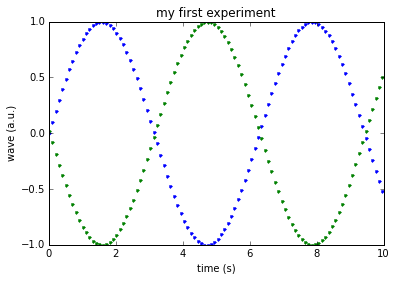

In [129]:
liveplot = LivePlot(test.q)

In [94]:
liveplot.fig

In [85]:
test.start()
plot.start()

In [86]:
plot.join()

In [88]:
test.join()

done!


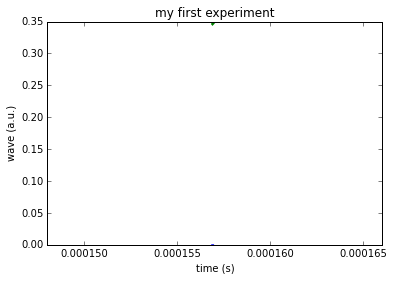

In [82]:
fig = figure()
title(test.title)
xlabel('time (s)'), ylabel('wave (a.u.)')
plot(d['time1'], d['wave1'], '.')
plot(d['time1'], d['wave2'], '.')